In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt # 画图常用库
# https://www.kaggle.com/themlguy/undersample-and-oversample-approach-explored

# 导入数据 

读入训练集

In [2]:
train = pd.read_csv('./data/creditcard_train.csv')
train.head()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


观察数据

In [3]:
train.describe()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,...,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000,227789.000000
mean,142485.953049,94864.232641,0.003432,0.000944,-0.000120,-0.000068,0.000143,-0.001337,0.000367,-0.000810,...,-0.000996,0.000211,0.000768,-0.000303,0.000415,0.000354,-0.000274,0.000256,87.968090,0.001734
std,82226.825346,47494.839872,1.951633,1.644484,1.509267,1.415671,1.382926,1.332437,1.240397,1.182995,...,0.731466,0.724361,0.615871,0.605033,0.520877,0.482573,0.402413,0.322572,250.749915,0.041606
min,0.000000,0.000000,-41.928738,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-50.943369,...,-22.797604,-10.933144,-36.666000,-2.836627,-7.495741,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,71286.000000,54240.000000,-0.919351,-0.598515,-0.890830,-0.849439,-0.691556,-0.768981,-0.554361,-0.209116,...,-0.228227,-0.541399,-0.161482,-0.354815,-0.317194,-0.327033,-0.070966,-0.052882,5.510000,0.000000
50%,142512.000000,84765.000000,0.021299,0.065609,0.179125,-0.020344,-0.055427,-0.275720,0.040358,0.022335,...,-0.029672,0.006675,-0.011212,0.040610,0.017127,-0.052128,0.001320,0.011294,21.990000,0.000000
75%,213657.000000,139341.000000,1.316593,0.805156,1.026138,0.742383,0.610164,0.397139,0.570242,0.327959,...,0.185470,0.527543,0.147993,0.438805,0.350827,0.241380,0.090764,0.077988,77.000000,0.000000
max,284806.000000,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,20.007208,...,27.202839,8.361985,22.528412,4.584549,7.519589,3.517346,31.612198,22.620072,25691.160000,1.000000


In [4]:
print(train.groupby(['Class']).size())

Class
0    227394
1       395
dtype: int64


In [5]:
Fraud_transacation = train[train["Class"]==1]
Normal_transacation = train[train["Class"]==0]
print("percentage of fraud transacation is", len(Fraud_transacation) / len(train) * 100)
print("percentage of normal transacation is", len(Normal_transacation) / len(train) * 100)


percentage of fraud transacation is 0.17340609072431065
percentage of normal transacation is 99.82659390927569


观察amount和label的关系

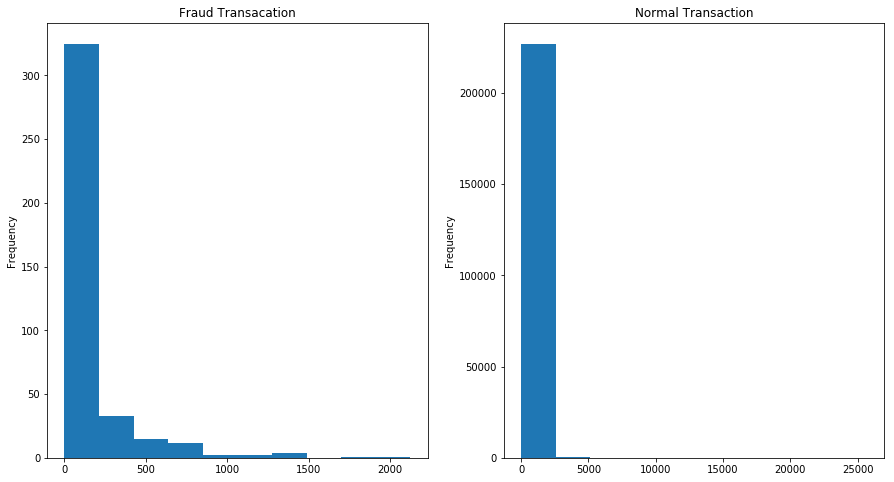

In [6]:
plt.figure(figsize=(15, 8))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

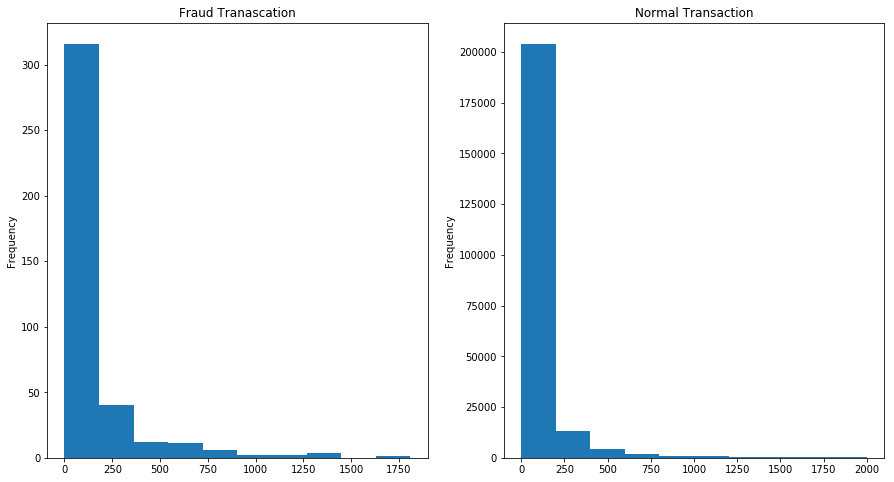

In [7]:
plt.figure(figsize=(15, 8))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<=2000].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2000].Amount.plot.hist(title="Normal Transaction")

# 数据预处理

归一化

In [6]:
from sklearn.preprocessing import StandardScaler

train['Amount'] = StandardScaler().fit_transform(train['Amount'].values.reshape(-1, 1))
train['Time'] = StandardScaler().fit_transform(train['Amount'].values.reshape(-1, 1))

去掉无关feature

In [7]:
train.drop(['Id'], axis=1, inplace=True)
print(train.head())

       Time        V1        V2        V3        V4        V5        V6  \
0  0.245871 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -0.340093  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2  1.159293 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3  0.141703 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -0.071697 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...         V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474   
1 -0.078803  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288   
2  0.791461  0.247676 -1.514654  ...    0.247998  0.771679  0.909412   
3  0.237609  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321   
4  0.592941 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  Class  
0  0.066928  0.128539 -0.189115  0.133558 -0.

# 不处理imbalanced data

划分训练集

In [8]:
from sklearn.model_selection import train_test_split

X = train.iloc[:, train.columns != 'Class']
y = train.iloc[:, train.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(182231, 30)
(45558, 30)


训练model

In [13]:
def generateReport(model_type, ground_truth, predict):
    scores.append((model_type, f1_score(ground_truth, predict), 
                 precision_score(ground_truth, predict),
                 recall_score(ground_truth, predict),
                 accuracy_score(ground_truth, predict)))

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score, classification_report

scores = []

classifiers = {'LogisticRegression': LogisticRegression(),
               'DecisionTreeClassifier': DecisionTreeClassifier(), 
               'RandomForestClassifier': RandomForestClassifier(),
               'AdaBoostClassifier': AdaBoostClassifier(), 
               'GradientBoostingClassifier': GradientBoostingClassifier()}

for key, classifier in classifiers.items():
    print(key)
    classifier.fit(X_train, y_train.values.ravel())
    classifier_pred = classifier.predict(X_test)
    print(classification_report(y_test, classifier_pred))

LogisticRegression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     45468
          1       0.90      0.68      0.77        90

avg / total       1.00      1.00      1.00     45558

DecisionTreeClassifier
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     45468
          1       0.84      0.73      0.78        90

avg / total       1.00      1.00      1.00     45558

RandomForestClassifier
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     45468
          1       0.95      0.79      0.86        90

avg / total       1.00      1.00      1.00     45558

AdaBoostClassifier
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     45468
          1       0.92      0.76      0.83        90

avg / total       1.00      1.00      1.00     45558

GradientBoostingClassifier
             precision    rec

# Undersampling the Majority Class

对于多的那部分数据，按照一定比例随机采样

In [25]:
train = train.sample(frac=1) # shuffle the data
fraud_df = train.loc[train['Class'] == 1]
non_fraud_df = train.loc[train['Class'] != 1][:395]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# shuffle the rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
print(new_df.shape)
new_df.head()


(790, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
203961,-0.087849,1.939908,-0.223991,-1.416081,0.620650,-0.037574,-1.220199,0.399722,-0.354672,0.483971,...,-0.118096,-0.354423,0.170272,-0.012223,-0.102699,0.182584,-0.084522,-0.056200,-0.087849,0
204291,-0.347750,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,...,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,-0.347750,1
13798,0.047944,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,...,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,0.047944,1
8458,-0.346833,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,...,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,-0.346833,1
34643,1.101586,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.101586,1


In [26]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [27]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.model_selection import cross_val_score

classifiers = {'LogisticRegression': LogisticRegression(),
               'DecisionTreeClassifier': DecisionTreeClassifier(), 
               'RandomForestClassifier': RandomForestClassifier(),
               'AdaBoostClassifier': AdaBoostClassifier(), 
               'GradientBoostingClassifier': GradientBoostingClassifier()}

for key, classifier in classifiers.items():
    print(key)
    classifier.fit(X_train_under, y_train_under.values.ravel())
    training_score = cross_val_score(classifier, X_train_under, y_train_under.values.ravel(), cv=5, scoring='f1')
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% f1 score")

LogisticRegression
Classifiers:  LogisticRegression has a training score of 93.0 % f1 score
DecisionTreeClassifier
Classifiers:  DecisionTreeClassifier has a training score of 90.0 % f1 score
RandomForestClassifier
Classifiers:  RandomForestClassifier has a training score of 93.0 % f1 score
AdaBoostClassifier
Classifiers:  AdaBoostClassifier has a training score of 92.0 % f1 score
GradientBoostingClassifier
Classifiers:  GradientBoostingClassifier has a training score of 93.0 % f1 score


In [85]:
from sklearn.model_selection import GridSearchCV

# Linear Regression Classifier
lr_params = {"penalty": ['l1', 'l2'], 
             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_lr = GridSearchCV(LogisticRegression(), lr_params, scoring='f1')
grid_lr.fit(X_train_under, y_train_under.values.ravel())
param_lr = grid_lr.best_estimator_
print(grid_lr.best_params_)

# Decision Tree Classifier
dt_params = {"criterion": ["gini", "entropy"], 
             "max_depth": list(range(2,4,1)), 
             "min_samples_leaf": list(range(5,7,1))}
grid_dt = GridSearchCV(DecisionTreeClassifier(), dt_params, scoring='f1')
grid_dt.fit(X_train, y_train)

param_dt = grid_dt.best_estimator_
print(grid_dt.best_params_)

# Random Forest Classifier
rf_params = { 'n_estimators': [200, 500],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, scoring='f1')
grid_rf.fit(X_train_under, y_train_under.values.ravel())
param_rf = grid_rf.best_estimator_
print(grid_rf.best_params_)

# Adaboost Classifier
ab_params = { 'n_estimators': [50, 100],
              'learning_rate' : [0.01,0.05,0.1,0.3,1]}
grid_ab = GridSearchCV(AdaBoostClassifier(), ab_params, scoring='f1')
grid_ab.fit(X_train_under, y_train_under.values.ravel())
param_ab = grid_ab.best_estimator_
print(grid_ab.best_params_)

# Gradient Boosting Classifier
gb_params = { "learning_rate": [0.01,0.05,0.1,0.3,1],
              "max_features":["log2","sqrt"],
              "criterion": ["friedman_mse",  "mae"]}
grid_gb = GridSearchCV(GradientBoostingClassifier(), gb_params, scoring='f1')
grid_gb.fit(X_train_under, y_train_under.values.ravel())
param_gb = grid_gb.best_estimator_
print(grid_gb.best_params_)

/Users/jingjingy/Python/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jingjingy/Python/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jingjingy/Python/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'C': 0.1, 'penalty': 'l2'}
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}
{'learning_rate': 0.1, 'n_estimators': 100}
{'criterion': 'friedman_mse', 'learning_rate': 0.3, 'max_features': 'sqrt'}


In [86]:
param_lr_score = cross_val_score(param_lr, X_train_under, y_train_under.values.ravel(), cv=5, scoring='f1')
print('Logistic regression cross validation f1 score: ', round(param_lr_score.mean() * 100, 2).astype(str) + '%')

param_dt_score = cross_val_score(param_dt, X_train_under, y_train_under.values.ravel(), cv=5, scoring='f1')
print('Decision Tree cross validation f1 score: ', round(param_dt_score.mean() * 100, 2).astype(str) + '%')

param_rf_score = cross_val_score(param_rf, X_train_under, y_train_under.values.ravel(), cv=5, scoring='f1')
print('Random Forest cross validation f1 score: ', round(param_rf_score.mean() * 100, 2).astype(str) + '%')

param_ab_score = cross_val_score(param_ab, X_train_under, y_train_under.values.ravel(), cv=5, scoring='f1')
print('Adaboost cross validation f1 score: ', round(param_ab_score.mean() * 100, 2).astype(str) + '%')

param_gb_score = cross_val_score(param_gb, X_train_under, y_train_under.values.ravel(), cv=5, scoring='f1')
print('Gradient Boosting cross validation f1 score: ', round(param_gb_score.mean() * 100, 2).astype(str) + '%')

Logistic regression cross validation f1 score:  93.46%
Decision Tree cross validation f1 score:  90.68%
Random Forest cross validation f1 score:  92.34%
Adaboost cross validation f1 score:  93.9%
Gradient Boosting cross validation f1 score:  93.4%


In [87]:
pred_under = param_ab.predict(X_test_under)
print(f1_score(y_test_under, pred_under))

0.9647058823529412


# Oversampling the Minority Class

对于少的那部分数据，将其进行扩充

In [69]:
print(len(y_train[y_train['Class'] == 1]))

305


In [76]:
from imblearn.over_sampling import SMOTE


print("Before OverSampling, counts of label '1': {}".format(len(y_train[y_train['Class'] == 1])))
print("Before OverSampling, counts of label '0': {} \n".format(len(y_train[y_train['Class'] == 0])))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 305
Before OverSampling, counts of label '0': 181926 



/Users/jingjingy/Python/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After OverSampling, the shape of train_X: (363852, 30)
After OverSampling, the shape of train_y: (363852,) 

After OverSampling, counts of label '1': 181926
After OverSampling, counts of label '0': 181926


In [77]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=42)

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

lr_params = {"penalty": ['l1', 'l2'], 
             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lr_over = GridSearchCV(LogisticRegression(), lr_params)
grid_lr_over.fit(X_train_over, y_train_over)
param_lr_over = grid_lr_over.best_estimator_
print(grid_lr_over.best_params_)

{'C': 100, 'penalty': 'l2'}


In [82]:
# training f1 score
param_lr_score_over = param_lr_over.predict(X_train_over)
print(classification_report(y_train_over, param_lr_score_over))
oversampling_train_f1 = f1_score(y_train_over, param_lr_score_over)
print(oversampling_train_f1)

             precision    recall  f1-score   support

          0       0.94      0.97      0.96    145494
          1       0.97      0.94      0.95    145587

avg / total       0.96      0.96      0.96    291081

0.9549518689661439


In [84]:
# testing f1 score
y_pre = param_lr_over.predict(X_test_over)
print(classification_report(y_test_over, y_pre))
oversampling_test_f1 = f1_score(y_test_over, y_pre)
print(oversampling_test_f1)

             precision    recall  f1-score   support

          0       0.94      0.97      0.96     36432
          1       0.97      0.94      0.95     36339

avg / total       0.96      0.96      0.96     72771

0.9545715767489452
